In [29]:
import pandas as pd
import string
from pandas import DataFrame
from pandas import Series
import re
import numpy as np
import matplotlib.pyplot as plt


In [30]:
df = pd.read_csv(r'C:\Users\dell\Desktop\pliki\translated_comments.csv')
df.head()

,comment,likes,my_polarity,eng_comment
0,В Польшу уехали не от хорошей жизни.Я сам убеж...,7.0,-1.0,They did not leave Poland from a good life. I ...
1,"Здравствуйте, Светлана! Честно говоря, мы до л...",3.0,1.0,"Hello Svetlana! Honestly, we ourselves did not..."
2,"люди разные в разных странах, и не зависит от ...",3.0,-1.0,"People are different in different countries, a..."
3,"Светлана, ты молодец 👍💪💪",1.0,1.0,"Svetlana, you're well done"
4,Приветствую. Автор высказался субъективно. Я м...,8.0,0.0,Greetings. The author spoke subjectively. For ...


In [31]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

In [32]:
scores = []

for sentence in df['eng_comment']:
    score = analyser.polarity_scores(sentence)
    scores.append(score)

In [33]:
scores = pd.DataFrame(scores)

In [34]:
df['compound_vad'] = scores['compound']
df['negative_vad'] = scores['neg']
df['neutral_vad'] = scores['neu']
df['positive_vad'] = scores['pos']
df.head()

,comment,likes,my_polarity,eng_comment,compound_vad,negative_vad,neutral_vad,positive_vad
0,В Польшу уехали не от хорошей жизни.Я сам убеж...,7.0,-1.0,They did not leave Poland from a good life. I ...,0.1838,0.061,0.831,0.108
1,"Здравствуйте, Светлана! Честно говоря, мы до л...",3.0,1.0,"Hello Svetlana! Honestly, we ourselves did not...",0.9709,0.045,0.787,0.168
2,"люди разные в разных странах, и не зависит от ...",3.0,-1.0,"People are different in different countries, a...",-0.7274,0.139,0.782,0.079
3,"Светлана, ты молодец 👍💪💪",1.0,1.0,"Svetlana, you're well done",0.2732,0.000,0.588,0.412
4,Приветствую. Автор высказался субъективно. Я м...,8.0,0.0,Greetings. The author spoke subjectively. For ...,-0.1675,0.096,0.843,0.061


In [35]:
# Set type of polarity
polarity = []
for i in range(len(df)):
    if (df['compound_vad'][i] <= - 0.05):
        polarity.append("Negative")
    elif (df['compound_vad'][i] >= 0.05):
        polarity.append("Positive")
    else:
        polarity.append("Neutral")


In [36]:
polarity = pd.DataFrame(polarity)
df['vad_pred'] = polarity
df.head()

,comment,likes,my_polarity,eng_comment,compound_vad,negative_vad,neutral_vad,positive_vad,vad_pred
0,В Польшу уехали не от хорошей жизни.Я сам убеж...,7.0,-1.0,They did not leave Poland from a good life. I ...,0.1838,0.061,0.831,0.108,Positive
1,"Здравствуйте, Светлана! Честно говоря, мы до л...",3.0,1.0,"Hello Svetlana! Honestly, we ourselves did not...",0.9709,0.045,0.787,0.168,Positive
2,"люди разные в разных странах, и не зависит от ...",3.0,-1.0,"People are different in different countries, a...",-0.7274,0.139,0.782,0.079,Negative
3,"Светлана, ты молодец 👍💪💪",1.0,1.0,"Svetlana, you're well done",0.2732,0.000,0.588,0.412,Positive
4,Приветствую. Автор высказался субъективно. Я м...,8.0,0.0,Greetings. The author spoke subjectively. For ...,-0.1675,0.096,0.843,0.061,Negative


C:\Users\dell\AppData\Local\Temp/ipykernel_17156/2117879187.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Neutral', 'Negative', 'Positive'])


Text(0.5, 1.0, "Sentiment of 'comments' by vader")

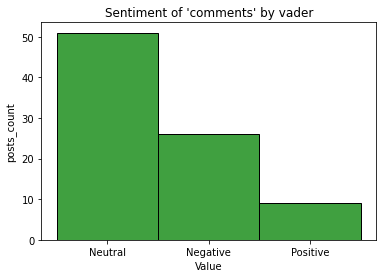

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df['vad_pred'].value_counts()

ax = sns.histplot(df["vad_pred"], color = 'green')
#ax.set_style('darkgrid')
ax.set_xlabel("Value")
ax.set_ylabel("posts_count")

ax.set_xticklabels(['Neutral', 'Negative', 'Positive'])
ax.set_title("Sentiment of 'comments' by vader") 

In [39]:
df['vad_pred'] = df['vad_pred'].replace('Neutral', '0', regex=True)
df['vad_pred'] = df['vad_pred'].replace('Positive', '1', regex=True)
df['vad_pred'] = df['vad_pred'].replace('Negative', '-1', regex=True)

In [40]:
df.to_csv('C:/Users/dell/Desktop/pliki/labeled_vader.csv', encoding = 'utf-8',  index = False)

In [41]:
df = pd.read_csv(r'C:\Users\dell\Desktop\pliki\labeled_vader.csv')

In [42]:
df

,comment,likes,my_polarity,eng_comment,compound_vad,negative_vad,neutral_vad,positive_vad,vad_pred
0,В Польшу уехали не от хорошей жизни.Я сам убеж...,7.0,-1.0,They did not leave Poland from a good life. I ...,0.1838,0.061,0.831,0.108,1
1,"Здравствуйте, Светлана! Честно говоря, мы до л...",3.0,1.0,"Hello Svetlana! Honestly, we ourselves did not...",0.9709,0.045,0.787,0.168,1
2,"люди разные в разных странах, и не зависит от ...",3.0,-1.0,"People are different in different countries, a...",-0.7274,0.139,0.782,0.079,-1
3,"Светлана, ты молодец 👍💪💪",1.0,1.0,"Svetlana, you're well done",0.2732,0.000,0.588,0.412,1
4,Приветствую. Автор высказался субъективно. Я м...,8.0,0.0,Greetings. The author spoke subjectively. For ...,-0.1675,0.096,0.843,0.061,-1
...,...,...,...,...,...,...,...,...,...
81,спасибо вам за написанное! Спасибо что прочита...,1.0,1.0,Thank you for the written! Thank you for readi...,0.6792,0.000,0.700,0.300,1
82,да мне бы знающего человека и разбирающегося в...,0.0,1.0,"Yes, I would be a knowledgeable person and und...",0.8617,0.000,0.745,0.255,1
83,"Ну, так перечитайте внимательно ЧТО ИМЕННО Вы ...",3.0,0.0,"Well, so read carefully what exactly you wrote...",-0.0571,0.141,0.682,0.176,-1
84,"я видела их посты,я читала о чем пишут люди! В...",9.0,1.0,"I saw their posts, I read what people write ab...",0.9847,0.000,0.735,0.265,1


In [43]:
df[df.compound_vad < -0.9]

,comment,likes,my_polarity,eng_comment,compound_vad,negative_vad,neutral_vad,positive_vad,vad_pred
16,ЭТОТ ПОСТ НАПИСАН НЕ О НАЦИОНАЛИЗМЕ\n НЕ ПРОТИ...,15.0,-1.0,This post is not written about nationalism\n N...,-0.9488,0.202,0.760,0.038,-1
57,"я против политики была,есть и буду!!!!\n Мы,мо...",1.0,0.0,"I was against politics, I am and I will !!!!\n...",-0.9529,0.211,0.789,0.000,-1
71,я много чего вижу!!!!! Но смысл? Если человек ...,1.0,-1.0,I see a lot of things !!!!! But the meaning? I...,-0.9063,0.144,0.830,0.026,-1
75,Не о чём. Мы теперь все психологи и психотерап...,1.0,-1.0,About nothing. We are now all psychologists an...,-0.9412,0.173,0.780,0.046,-1
76,вот этот пессимистичный текст точно не поспосо...,3.0,-1.0,This pessimistic text will definitely not cont...,-0.9237,0.140,0.838,0.022,-1


In [44]:
df[df.positive_vad > 0.39]

,comment,likes,my_polarity,eng_comment,compound_vad,negative_vad,neutral_vad,positive_vad,vad_pred
3,"Светлана, ты молодец 👍💪💪",1.0,1.0,"Svetlana, you're well done",0.2732,0.000,0.588,0.412,1
18,Благодарю,2.0,1.0,Thanks to,0.4404,0.000,0.256,0.744,1
30,Отлично. А политику Вы где увидели?),0.0,0.0,Excellent. Where did you see politics?),0.5719,0.000,0.575,0.425,1
33,Спасибо вам за вашу поддержку,3.0,1.0,Thank you for your support,0.6369,0.000,0.366,0.634,1
68,"да,именно субъективно,спасибо что сделали акце...",0.0,0.0,"Yes, it is subjective, thanks for focusing! Ev...",0.6800,0.137,0.469,0.394,1


In [45]:
df[df.negative_vad > 0.23]

,comment,likes,my_polarity,eng_comment,compound_vad,negative_vad,neutral_vad,positive_vad,vad_pred
15,"@Svitlana Milewska а что вас так напугало, что...",6.0,-1.0,@Svitlana milewska And what scared you so much...,-0.6597,0.300,0.586,0.114,-1
19,"Как говорится , в семье не без урода, везде хв...",5.0,-1.0,"As they say, the family is not without a freak...",-0.6849,0.303,0.697,0.000,-1
34,как же Вас тянет всех к Майдану то))в 2014 нач...,0.0,0.0,"How do you are drawn to Maidan then)) In 2014,...",-0.7579,0.236,0.695,0.069,-1
45,Живу в Минске. Нормальные обычные люди. Сволоч...,2.0,0.0,I live in Minsk. Normal ordinary people. Basta...,-0.6124,0.267,0.733,0.000,-1
80,"Сплочённые, но доверчивые. Этим пользуются наш...",0.0,-1.0,"Coated, but gullible. Our enemies use this.",-0.8201,0.602,0.398,0.000,-1


In [46]:
import nltk

# Download the lexicon
nltk.download("vader_lexicon")

# Import the lexicon 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create an instance of SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [47]:
sentence = "Coated, but gullible. Our enemies use this."
print(sent_analyzer.polarity_scores(sentence))

{'neg': 0.602, 'neu': 0.398, 'pos': 0.0, 'compound': -0.8201}


In [48]:
df[df.compound_vad > 0.98]

,comment,likes,my_polarity,eng_comment,compound_vad,negative_vad,neutral_vad,positive_vad,vad_pred
9,"Не могу не сказать о украинцах..\nВсе,кто был ...",20.0,1.0,I can't help but say about Ukrainians ..\nAll ...,0.9872,0.018,0.779,0.203,1
46,"И вот в большинстве так.... Пишу об одном,но в...",9.0,1.0,And in the most part like this .... I write ab...,0.9858,0.089,0.630,0.280,1
50,"если читать мой выплеск,там обо всем написало ...",2.0,1.0,"If you read my splash, there it wrote about ev...",0.9877,0.020,0.683,0.298,1
74,"я немного знакома с психологией,немного понима...",1.0,1.0,"I am a little familiar with psychology, I unde...",0.9937,0.000,0.630,0.370,1
84,"я видела их посты,я читала о чем пишут люди! В...",9.0,1.0,"I saw their posts, I read what people write ab...",0.9847,0.000,0.735,0.265,1


In [49]:
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentence = 'Communication in this area is very bad'
tokenized_sentence = nltk.word_tokenize(sentence)

sid = SentimentIntensityAnalyzer()

pos_word_list=[]
neu_word_list=[]
neg_word_list=[]

for word in tokenized_sentence:
    if (sid.polarity_scores(word)['compound']) >= 0.1:
        pos_word_list.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.1:
        neg_word_list.append(word)
    else:
        neu_word_list.append(word)  
        
score = sid.polarity_scores(sentence)        
        
print(sentence)
print('\nPositive:',pos_word_list)        
print('Neutral:',neu_word_list)    
print('Negative:',neg_word_list) 
print('Scores:', score, '\n')


Communication in this area is very bad

Positive: []
Neutral: ['Communication', 'in', 'this', 'area', 'is', 'very']
Negative: ['bad']
Scores: {'neg': 0.387, 'neu': 0.613, 'pos': 0.0, 'compound': -0.5849} 



In [50]:
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentence = 'Breakfast in this hotel is beyond praise'
tokenized_sentence = nltk.word_tokenize(sentence)

sid = SentimentIntensityAnalyzer()

pos_word_list=[]
neu_word_list=[]
neg_word_list=[]

for word in tokenized_sentence:
    if (sid.polarity_scores(word)['compound']) >= 0.1:
        pos_word_list.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.1:
        neg_word_list.append(word)
    else:
        neu_word_list.append(word)  
        
score = sid.polarity_scores(sentence)        
        
print(sentence)
print('\nPositive:',pos_word_list)        
print('Neutral:',neu_word_list)    
print('Negative:',neg_word_list) 
print('Scores:', score, '\n')

Breakfast in this hotel is beyond praise

Positive: ['praise']
Neutral: ['Breakfast', 'in', 'this', 'hotel', 'is', 'beyond']
Negative: []
Scores: {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.5574} 



In [51]:
df = pd.read_csv(r'C:\Users\dell\Desktop\pliki\labeled_vader.csv')

In [52]:
df

,comment,likes,my_polarity,eng_comment,compound_vad,negative_vad,neutral_vad,positive_vad,vad_pred
0,В Польшу уехали не от хорошей жизни.Я сам убеж...,7.0,-1.0,They did not leave Poland from a good life. I ...,0.1838,0.061,0.831,0.108,1
1,"Здравствуйте, Светлана! Честно говоря, мы до л...",3.0,1.0,"Hello Svetlana! Honestly, we ourselves did not...",0.9709,0.045,0.787,0.168,1
2,"люди разные в разных странах, и не зависит от ...",3.0,-1.0,"People are different in different countries, a...",-0.7274,0.139,0.782,0.079,-1
3,"Светлана, ты молодец 👍💪💪",1.0,1.0,"Svetlana, you're well done",0.2732,0.000,0.588,0.412,1
4,Приветствую. Автор высказался субъективно. Я м...,8.0,0.0,Greetings. The author spoke subjectively. For ...,-0.1675,0.096,0.843,0.061,-1
...,...,...,...,...,...,...,...,...,...
81,спасибо вам за написанное! Спасибо что прочита...,1.0,1.0,Thank you for the written! Thank you for readi...,0.6792,0.000,0.700,0.300,1
82,да мне бы знающего человека и разбирающегося в...,0.0,1.0,"Yes, I would be a knowledgeable person and und...",0.8617,0.000,0.745,0.255,1
83,"Ну, так перечитайте внимательно ЧТО ИМЕННО Вы ...",3.0,0.0,"Well, so read carefully what exactly you wrote...",-0.0571,0.141,0.682,0.176,-1
84,"я видела их посты,я читала о чем пишут люди! В...",9.0,1.0,"I saw their posts, I read what people write ab...",0.9847,0.000,0.735,0.265,1


In [53]:
#add TextBlob

In [54]:
# Sentiment Scoring
from textblob import TextBlob

In [55]:
df["blob_polarity"] = df ["eng_comment"].apply(lambda x: TextBlob(x).sentiment[0])

In [56]:
# Add the column for summarising the polarity
def getAnalysis(score):
    if score < 0:
        return '-1'
    elif score == 0:
        return '0'
    else:
        return '1'
    

In [57]:
df['blob_pred'] = df['blob_polarity'].apply(lambda x: getAnalysis(x))

In [58]:
df

,comment,likes,my_polarity,eng_comment,compound_vad,negative_vad,neutral_vad,positive_vad,vad_pred,blob_polarity,blob_pred
0,В Польшу уехали не от хорошей жизни.Я сам убеж...,7.0,-1.0,They did not leave Poland from a good life. I ...,0.1838,0.061,0.831,0.108,1,0.232143,1
1,"Здравствуйте, Светлана! Честно говоря, мы до л...",3.0,1.0,"Hello Svetlana! Honestly, we ourselves did not...",0.9709,0.045,0.787,0.168,1,0.127078,1
2,"люди разные в разных странах, и не зависит от ...",3.0,-1.0,"People are different in different countries, a...",-0.7274,0.139,0.782,0.079,-1,0.122222,1
3,"Светлана, ты молодец 👍💪💪",1.0,1.0,"Svetlana, you're well done",0.2732,0.000,0.588,0.412,1,0.000000,0
4,Приветствую. Автор высказался субъективно. Я м...,8.0,0.0,Greetings. The author spoke subjectively. For ...,-0.1675,0.096,0.843,0.061,-1,0.250000,1
...,...,...,...,...,...,...,...,...,...,...,...
81,спасибо вам за написанное! Спасибо что прочита...,1.0,1.0,Thank you for the written! Thank you for readi...,0.6792,0.000,0.700,0.300,1,0.312500,1
82,да мне бы знающего человека и разбирающегося в...,0.0,1.0,"Yes, I would be a knowledgeable person and und...",0.8617,0.000,0.745,0.255,1,0.312500,1
83,"Ну, так перечитайте внимательно ЧТО ИМЕННО Вы ...",3.0,0.0,"Well, so read carefully what exactly you wrote...",-0.0571,0.141,0.682,0.176,-1,-0.116667,-1
84,"я видела их посты,я читала о чем пишут люди! В...",9.0,1.0,"I saw their posts, I read what people write ab...",0.9847,0.000,0.735,0.265,1,0.260714,1


In [59]:
# add dostoevsky

In [60]:
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel

In [61]:
list_of_posts = df['comment'].tolist()

In [62]:
tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel(tokenizer=tokenizer)
sentiment_list = []
results = model.predict(list_of_posts, k=2)
for sentiment in results:
    sentiment_list.append(sentiment)

In [63]:
neutral_list = []
negative_list = []
positive_list = []

for sentiment in sentiment_list:
    neutral = sentiment.get('neutral')
    negative = sentiment.get('negative')
    positive = sentiment.get('positive')

    if neutral is None:
        neutral_list.append(0)
    else:
        neutral_list.append(sentiment.get('neutral'))
    if negative is None:
        negative_list.append(0)
    else:
        negative_list.append(sentiment.get('negative'))
    if positive is None:
        positive_list.append(0)
    else:
        positive_list.append(sentiment.get('positive'))


In [64]:
df['neutral'] = neutral_list
df['negative'] = negative_list
df['positive'] = positive_list

In [65]:
THRESHOLD = 0.4


conditions = [
    (df['negative'] >= THRESHOLD),
    (df['neutral'] >= THRESHOLD ) & (df['neutral'] <= THRESHOLD),
    (df['positive'] >= THRESHOLD)
     ]

values = ["-1", "0", "1"]
df['dos_pred'] = np.select(conditions, values)

df.head()

,comment,likes,my_polarity,eng_comment,compound_vad,negative_vad,neutral_vad,positive_vad,vad_pred,blob_polarity,blob_pred,neutral,negative,positive,dos_pred
0,В Польшу уехали не от хорошей жизни.Я сам убеж...,7.0,-1.0,They did not leave Poland from a good life. I ...,0.1838,0.061,0.831,0.108,1,0.232143,1,0.334599,0.531219,0.000000,-1
1,"Здравствуйте, Светлана! Честно говоря, мы до л...",3.0,1.0,"Hello Svetlana! Honestly, we ourselves did not...",0.9709,0.045,0.787,0.168,1,0.127078,1,0.000000,0.239359,0.256842,0
2,"люди разные в разных странах, и не зависит от ...",3.0,-1.0,"People are different in different countries, a...",-0.7274,0.139,0.782,0.079,-1,0.122222,1,0.615098,0.201823,0.000000,0
3,"Светлана, ты молодец 👍💪💪",1.0,1.0,"Svetlana, you're well done",0.2732,0.000,0.588,0.412,1,0.000000,0,0.040856,0.000000,0.964865,1
4,Приветствую. Автор высказался субъективно. Я м...,8.0,0.0,Greetings. The author spoke subjectively. For ...,-0.1675,0.096,0.843,0.061,-1,0.250000,1,0.437833,0.300756,0.000000,0


In [66]:
df.to_csv('C:/Users/dell/Desktop/pliki/labeled_matrix.csv', encoding = 'utf-8',  index = False)